In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from collections import defaultdict

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score , GridSearchCV

from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

from collections import Counter
from collections import defaultdict

from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
%matplotlib inline
import datetime
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.metrics import f1_score, precision_score, recall_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import cross_val_predict
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.fixes import loguniform
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor


In [7]:

df_train = pd.read_csv("./X_trainc.csv",skipinitialspace=True)
df_test = pd.read_csv("./X_testc.csv",skipinitialspace=True)

In [8]:
df_train['Activity'] = df_train['Activity'] - 1
df_test['Activity'] = df_test['Activity'] - 1

df_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1",...,fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)",Activity,ActivityName,subject
0,0.288585,-0.020294,-0.132905,-0.995279,-0.407747,-0.602122,0.929294,0.359910,-0.058526,0.256892,...,-1.000000,-0.074323,-0.298676,-0.112754,0.030400,-0.464761,-0.018446,4,STANDING,1
1,0.278419,-0.016411,-0.123520,-0.998245,-0.714892,-0.570979,0.611627,0.284213,0.284595,0.115705,...,-1.000000,0.158075,-0.595051,0.053477,-0.007435,-0.732626,0.703511,4,STANDING,1
2,0.279653,-0.019467,-0.113462,-0.995380,-0.592235,-0.570979,0.273025,0.337202,-0.164739,0.017150,...,-0.555556,0.414503,-0.390748,-0.118559,0.177899,0.100699,0.808529,4,STANDING,1
3,0.279174,-0.026201,-0.123283,-0.996091,-0.627446,-0.911872,0.061436,0.198204,-0.264307,0.072545,...,-0.936508,0.404573,-0.117290,-0.036788,-0.012892,0.640011,-0.485366,4,STANDING,1
4,0.276629,-0.016570,-0.115362,-0.998139,-0.786553,-0.761434,0.313276,0.191161,0.086904,0.257615,...,-0.936508,0.087753,-0.351471,0.123320,0.122542,0.693578,-0.615971,4,STANDING,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.195643,-0.082077,-0.561607,-0.078255,-0.056751,-0.094106,...,-0.904762,-0.070157,-0.588433,-0.190437,0.829718,0.206972,-0.425619,1,WALKING_UPSTAIRS,30
7348,0.273853,-0.007749,-0.147468,-0.235309,0.178138,-0.051532,-0.361660,0.206839,-0.154722,0.032725,...,-0.904762,0.165259,-0.390738,0.064907,0.875679,-0.879033,0.400219,1,WALKING_UPSTAIRS,30
7349,0.273387,-0.017011,-0.045022,-0.218218,0.173131,0.152003,-0.376773,0.063584,-0.017019,-0.004323,...,-0.904762,0.195034,0.025145,0.052806,-0.266724,0.864404,0.701169,1,WALKING_UPSTAIRS,30
7350,0.289654,-0.018843,-0.158281,-0.219139,0.160333,0.021678,-0.475165,0.009588,-0.038354,-0.277801,...,-0.904762,0.013865,0.063907,-0.101360,0.700740,0.936674,-0.589479,1,WALKING_UPSTAIRS,30


In [9]:
df_train = df_train.drop(['ActivityName', 'subject'], axis = 1)
df_test = df_test.drop(['ActivityName', 'subject'],axis = 1)

In [10]:
y_train = pd.read_csv('y_train.txt', names=['Activity'])

y_test = pd.read_csv('y_test.txt', names=['Activity'])


class_mapping = {'WALKING':0,'WALKING_UPSTAIRS':1,'WALKING_DOWNSTAIRS':2,
                       'SITTING':3, 'STANDING':4,'LAYING':5}

In [11]:
y_train = y_train - 1
y_test = y_test - 1

y_train

,Activity
0,4
1,4
2,4
3,4
4,4
...,...
7347,1
7348,1
7349,1
7350,1


In [12]:
X_train = df_train.drop(['Activity'], axis = 1).values
y_train = np.array(y_train)

X_test = df_test.drop(['Activity'], axis = 1).values
y_test = np.array(y_test)

In [32]:
bb = SVC(gamma='scale', C=1, kernel='poly', class_weight='balanced', tol  = 0.001, degree = 4, probability = True)

bb.fit(X_train, y_train)

y_pred = bb.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test.ravel(), y_pred, target_names=class_mapping))

Accuracy 0.9524940617577197
F1-score 0.9518452125075582
                    precision    recall  f1-score   support

           WALKING       0.93      1.00      0.96       496
  WALKING_UPSTAIRS       0.96      0.91      0.93       471
WALKING_DOWNSTAIRS       0.96      0.95      0.96       420
           SITTING       0.94      0.91      0.92       491
          STANDING       0.92      0.94      0.93       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.95      2947
         macro avg       0.95      0.95      0.95      2947
      weighted avg       0.95      0.95      0.95      2947



In [14]:
def bb_predict(X):
    return bb.predict(X)

def bb_predict_proba(X):
    return bb.predict_proba(X)

In [15]:
y_pred = bb_predict(X_test)

print('Accuracy %.3f' % accuracy_score(y_test, y_pred))
print('F1-measure %.3f' % f1_score(y_test, y_pred, average = 'macro'))
print(classification_report(y_test,y_pred, target_names=class_mapping))

Accuracy 0.952
F1-measure 0.952
                    precision    recall  f1-score   support

           WALKING       0.93      1.00      0.96       496
  WALKING_UPSTAIRS       0.96      0.91      0.93       471
WALKING_DOWNSTAIRS       0.96      0.95      0.96       420
           SITTING       0.94      0.91      0.92       491
          STANDING       0.92      0.94      0.93       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.95      2947
         macro avg       0.95      0.95      0.95      2947
      weighted avg       0.95      0.95      0.95      2947



In [16]:
i2e = 32
x = X_test[i2e]

bb_outcome = bb_predict(x.reshape(1, -1))[0]
bb_outcome_str = y_test[bb_outcome]

print('bb(x) = { %s }' % bb_outcome_str)
print('')

bb(x) = { [4] }



In [17]:
sitting_instances=df_test.loc[df_test["Activity"]==3].index
len_sitting=len(sitting_instances)
print(sitting_instances)
print(len_sitting)

Index([  31,   32,   33,   34,   35,   36,   37,   38,   39,   40,
       ...
       2813, 2814, 2815, 2816, 2817, 2818, 2819, 2820, 2821, 2822],
      dtype='int64', length=491)
491


In [18]:
y_pred[sitting_instances]


array([4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 4, 3, 4,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,
       3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 1, 1, 1, 5, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 4, 4, 3, 3, 3, 4,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 4, 3, 4, 3, 4, 4, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [19]:
feature_names = [x for x in df_train.columns if x != 'Activity']

[str(v) for v in range(1,7)]

['1', '2', '3', '4', '5', '6']

In [20]:
from lime import lime_tabular
# LIME has one explainer for all the models
lime_explainer = lime_tabular.LimeTabularExplainer(X_test,feature_names=feature_names,
                                               discretize_continuous=False, class_names = class_mapping
                                              
                                             )

In [21]:
exp = lime_explainer.explain_instance(X_test[36], bb_predict_proba, top_labels= 2) # riceve l istanza che vuoi spiegare e la predicting prob
exp.local_exp # questa è la spiegazione. 1: classe ritornata dal modello


{4: [(3, -0.06053890039237345),
  (33, 0.02674298976443679),
  (4, -0.02640840445256776),
  (57, -0.025307704156748913),
  (108, -0.02505907325187805),
  (5, -0.017089317818190702),
  (68, -0.014579367814817945),
  (6, 0.013836003876526094),
  (126, -0.01298509318340324),
  (105, 0.011276473748177886)],
 3: [(3, -0.09402244486659767),
  (54, -0.07037200258129463),
  (4, -0.05758734567073849),
  (91, -0.03912489933075575),
  (90, -0.03809074503224737),
  (33, -0.034654126111255804),
  (57, 0.03404791076593944),
  (5, -0.02509742038978874),
  (108, -0.02485042241359663),
  (126, 0.020786900517981217)]}

In [22]:
exp.show_in_notebook(show_predicted_value=True, show_table = False)   

In [23]:
import shap
shap.initjs()

In [24]:
f = lambda x: bb_predict_proba(x)[:, 5]
med = np.median(X_test, axis=0).reshape((1, X_test.shape[1]))
shap_explainer = shap.KernelExplainer(f, med)

In [25]:
shap_values_single = shap_explainer.shap_values(x, nsamples=1000)

In [26]:
shap_values_single.shape

(152,)

In [27]:
import json
json.dumps(classification_report(y_test, y_pred, output_dict=True))

'{"0": {"precision": 0.9322033898305084, "recall": 0.9979838709677419, "f1-score": 0.9639727361246349, "support": 496}, "1": {"precision": 0.9617117117117117, "recall": 0.9065817409766455, "f1-score": 0.9333333333333333, "support": 471}, "2": {"precision": 0.9639423076923077, "recall": 0.9547619047619048, "f1-score": 0.9593301435406699, "support": 420}, "3": {"precision": 0.9388185654008439, "recall": 0.9063136456211812, "f1-score": 0.9222797927461139, "support": 491}, "4": {"precision": 0.9227941176470589, "recall": 0.943609022556391, "f1-score": 0.9330855018587362, "support": 532}, "5": {"precision": 0.9981412639405205, "recall": 1.0, "f1-score": 0.9990697674418605, "support": 537}, "accuracy": 0.9524940617577197, "macro avg": {"precision": 0.9529352260371585, "recall": 0.9515416974806441, "f1-score": 0.9518452125075582, "support": 2947}, "weighted avg": {"precision": 0.9528615920390318, "recall": 0.9524940617577197, "f1-score": 0.9522872303184149, "support": 2947}}'

In [28]:
json.loads(json.dumps(classification_report(y_test, y_pred, output_dict=True)))


{'0': {'precision': 0.9322033898305084,
  'recall': 0.9979838709677419,
  'f1-score': 0.9639727361246349,
  'support': 496},
 '1': {'precision': 0.9617117117117117,
  'recall': 0.9065817409766455,
  'f1-score': 0.9333333333333333,
  'support': 471},
 '2': {'precision': 0.9639423076923077,
  'recall': 0.9547619047619048,
  'f1-score': 0.9593301435406699,
  'support': 420},
 '3': {'precision': 0.9388185654008439,
  'recall': 0.9063136456211812,
  'f1-score': 0.9222797927461139,
  'support': 491},
 '4': {'precision': 0.9227941176470589,
  'recall': 0.943609022556391,
  'f1-score': 0.9330855018587362,
  'support': 532},
 '5': {'precision': 0.9981412639405205,
  'recall': 1.0,
  'f1-score': 0.9990697674418605,
  'support': 537},
 'accuracy': 0.9524940617577197,
 'macro avg': {'precision': 0.9529352260371585,
  'recall': 0.9515416974806441,
  'f1-score': 0.9518452125075582,
  'support': 2947},
 'weighted avg': {'precision': 0.9528615920390318,
  'recall': 0.9524940617577197,
  'f1-score': 0.

In [29]:
shap.force_plot(shap_explainer.expected_value, shap_values_single, features=x, feature_names=feature_names)

In [30]:
#shap_values = shap_explainer.shap_values(X_test, nsamples=500)

explainer = shap.KernelExplainer(bb.predict_proba, med)

shap_values = explainer.shap_values(X_test, nsamples=1500, approximate = True, n_jobs = -1 )

  0%|          | 0/2947 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
inverse_class_mapping = {v: k for k, v in class_mapping.items()}
inverse_class_mapping

{0: 'WALKING',
 1: 'WALKING_UPSTAIRS',
 2: 'WALKING_DOWNSTAIRS',
 3: 'SITTING',
 4: 'STANDING',
 5: 'LAYING'}

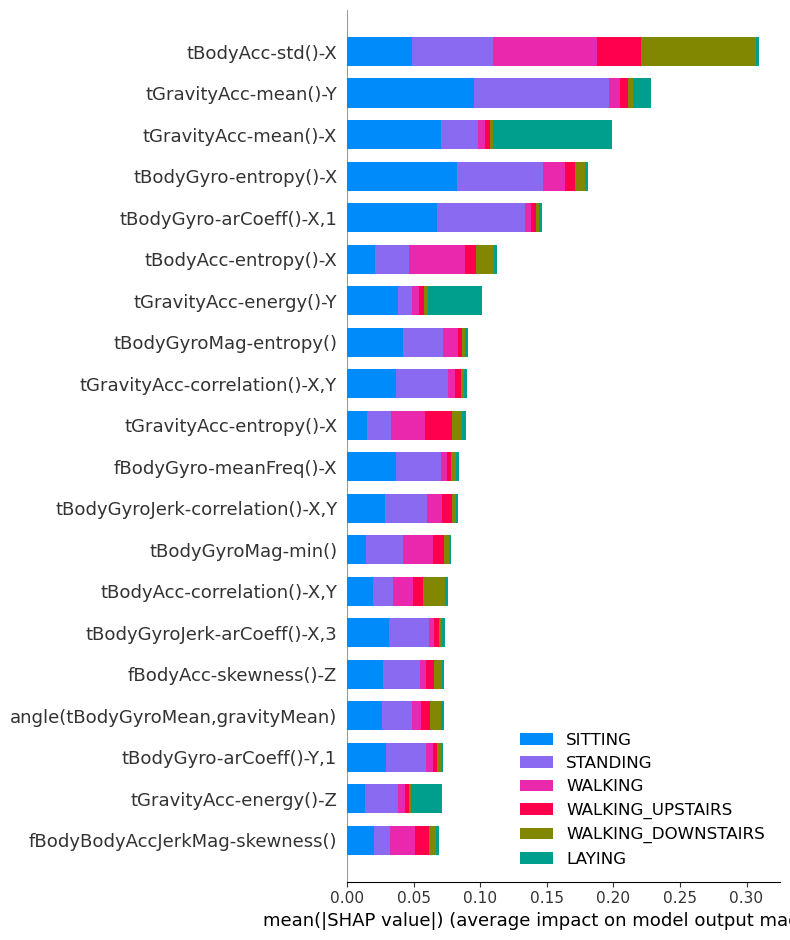

In [ ]:
shap.summary_plot(shap_values,
                  features = X_test,
                  feature_names = feature_names, class_names = inverse_class_mapping )

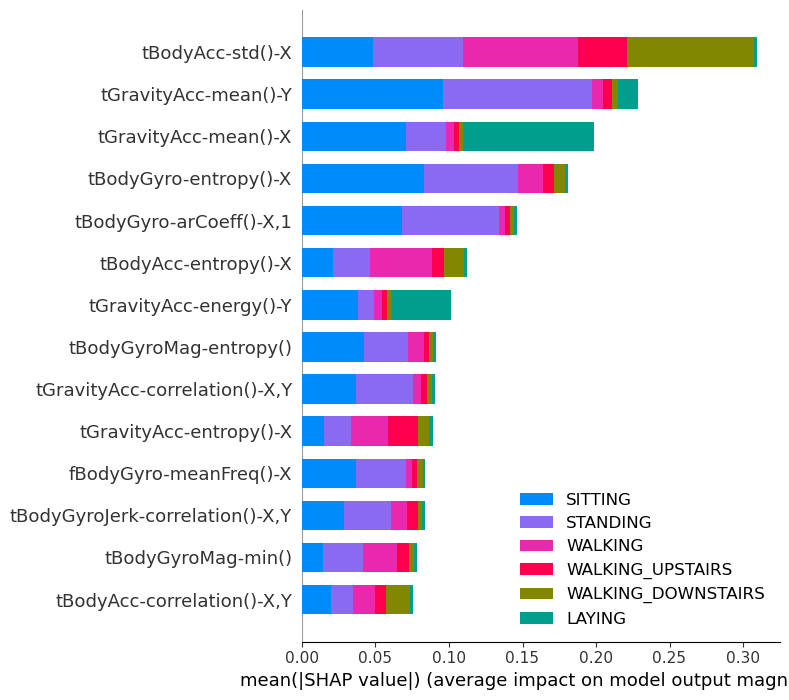

In [ ]:
shap.summary_plot(shap_values,
                  features = X_test,
                  feature_names = feature_names, class_names = inverse_class_mapping, max_display = 14 )

In [ ]:
class_mapping

{'WALKING': 0,
 'WALKING_UPSTAIRS': 1,
 'WALKING_DOWNSTAIRS': 2,
 'SITTING': 3,
 'STANDING': 4,
 'LAYING': 5}

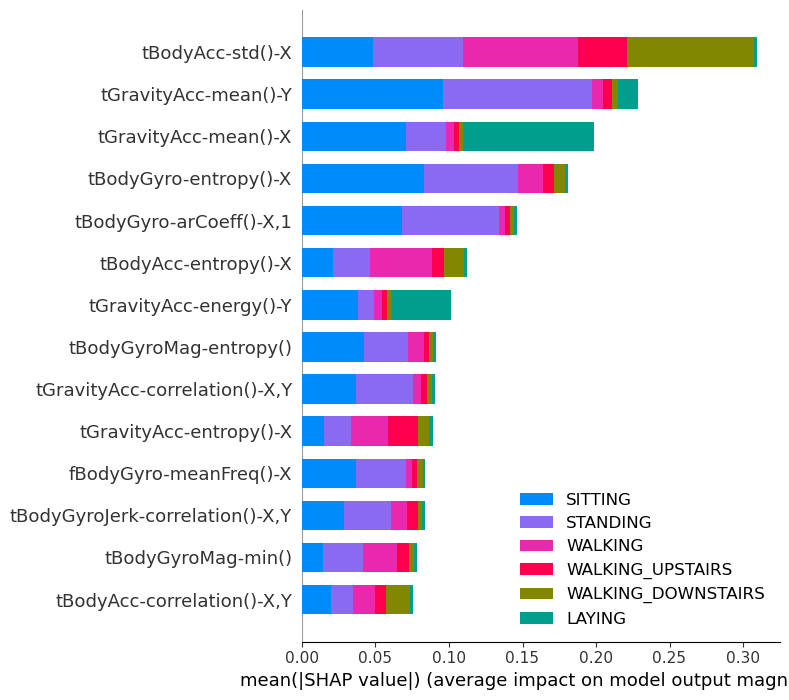

In [ ]:
shap.summary_plot(shap_values,
                  features = X_test,
                  feature_names = feature_names, plot_type = 'bar', max_display = 14, class_names = inverse_class_mapping)


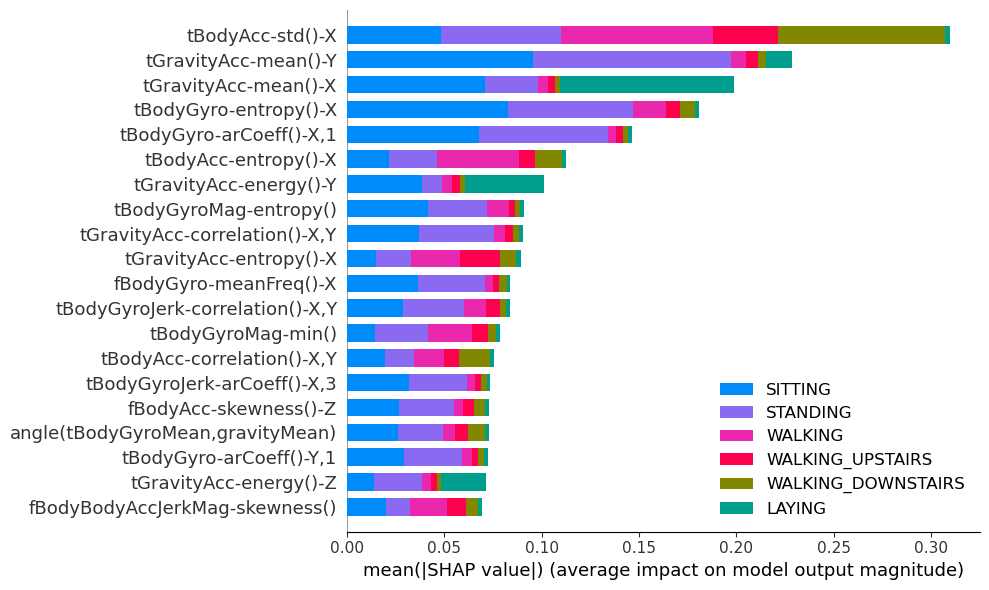

In [ ]:
import shap
import matplotlib.pyplot as plt

# Assuming you have already calculated the SHAP values
# shap_values = ...
# X_test = ...
# feature_names = ...
# class_mapping = ...

# Create the SHAP summary plot with class labels and colors
shap.summary_plot(shap_values,
                  features=X_test,
                  feature_names=feature_names,
                  plot_type='bar',
                  class_names=inverse_class_mapping,
                  plot_size=(10, 6))

# Show the plot
plt.show()

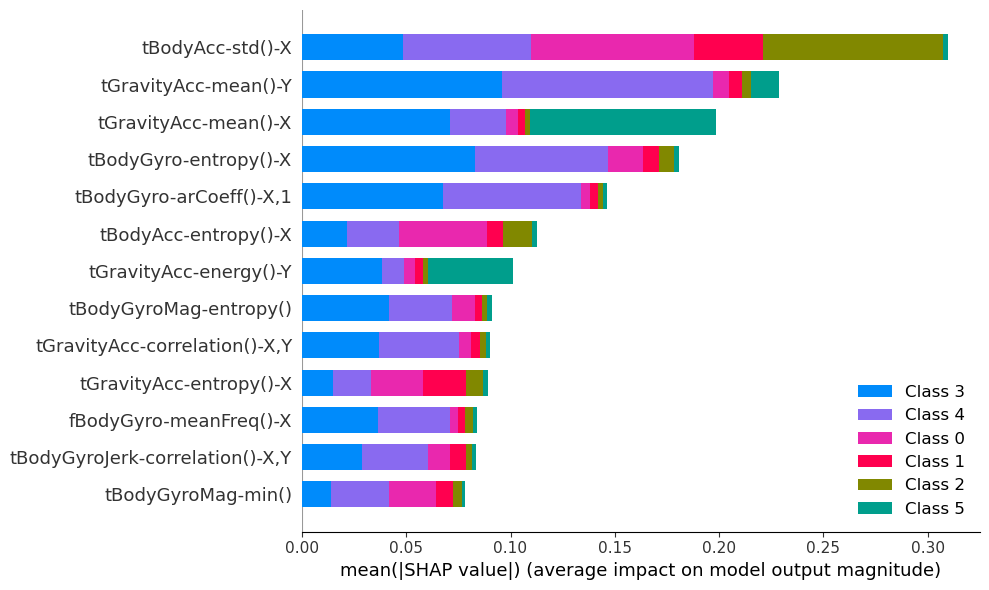

In [ ]:
import shap
import matplotlib.pyplot as plt

# Assuming you have already calculated the SHAP values
# shap_values = ...
# X_test = ...
# feature_names = ...
# class_mapping = ...

# Create the SHAP summary plot with class labels and colors
shap.summary_plot(shap_values,
                  features=X_test,
                  feature_names=feature_names,
                  plot_type='bar',
                  max_display = 13,
                  plot_size=(10, 6)
                , )

# Show the plot
plt.show()